In [70]:
# Enable these if automatic reloading of modules is wanted

# # Load extension for automatic reload of modules
#% load_ext autoreload
# # Enable autoreload for all modules
#% autoreload 2

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from PIL import Image

import principal_component_analysis as pca


# Part 1: PCA Dataset Visualization

In [72]:
# load the dataset
pca_dataset_txt = np.loadtxt("../pca_dataset.txt")


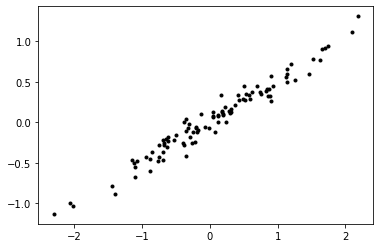

In [73]:
# plot the dataset
plt.scatter(pca_dataset_txt[:, 0], pca_dataset_txt[:, 1], s=3 ** 2, color="black")
plt.show()

In [74]:
# do principal component analysis
u, s, vh, energy, energy_per_component, removed_mean = pca.pca_forward(pca_dataset_txt, component_count=None)

In [75]:
# Energy in each of the components
print(f"{s}\n{energy_per_component}")

[9.94340494 0.82624201]
[0.9931426561434291, 0.006857343856570884]


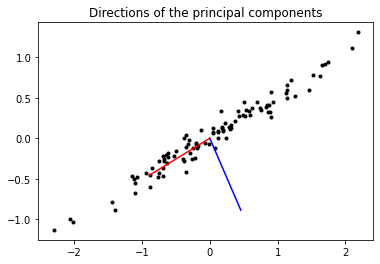

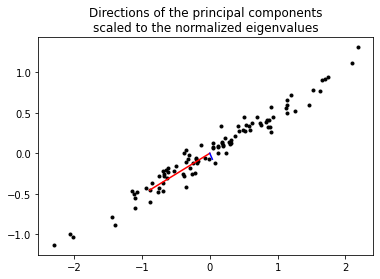

In [76]:
# plot the columns of vh.T (the rows of vh), which is the direction of the two principal components
plt.scatter(pca_dataset_txt[:, 0], pca_dataset_txt[:, 1], s=3 ** 2, color="black")
plt.plot([0, vh[0][0]], [0, vh[0][1]], color="red")
plt.plot([0, vh[1][0]], [0, vh[1][1]], color="blue")
plt.title("Directions of the principal components")
plt.show()

# plot it with normalized vectors
s_normalized = s / np.linalg.norm(s)

plt.scatter(pca_dataset_txt[:, 0], pca_dataset_txt[:, 1], s=3 ** 2, color="black")
plt.plot([0, vh[0][0]*s_normalized[0]], [0, vh[0][1]*s_normalized[0]], color="red")
plt.plot([0, vh[1][0]*s_normalized[1]], [0, vh[1][1]*s_normalized[1]], color="blue")
plt.title("Directions of the principal components\nscaled to the normalized eigenvalues")
plt.show()

# Part 2: Racoon Face Visualization

/var/folders/y7/sv3j_ts92tl18f9c49t054_w0000gn/T/ipykernel_15379/623738328.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  racoon = scipy.misc.face()


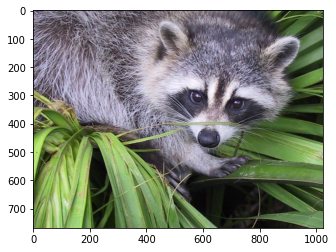

In [77]:
racoon = scipy.misc.face()
plt.imshow(racoon)

/var/folders/y7/sv3j_ts92tl18f9c49t054_w0000gn/T/ipykernel_15379/944732819.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  racoon_gray = scipy.misc.face(gray=True)


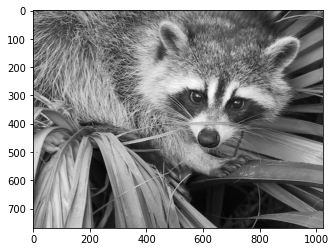

In [78]:
racoon_gray = scipy.misc.face(gray=True)
plt.imshow(racoon_gray, cmap="gray")
plt.show()

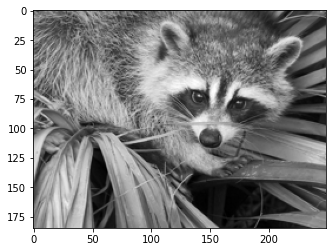

In [79]:
# resize the image (also change the datatype to float64 instead of uint8)
racoon_gray_pillow = Image.fromarray(racoon_gray)
racoon_gray_resized = np.array(racoon_gray_pillow.resize((249, 185)), dtype=float)
plt.imshow(racoon_gray_resized, cmap="gray")
plt.show()

Visualization with all components:
	Energy: 1.0


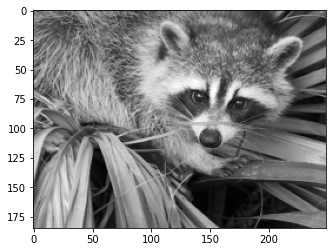

Visualization with 120 components:
	Energy: 0.9970932009156221


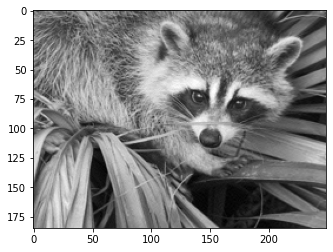

Visualization with 50 components:
	Energy: 0.9657115171973245


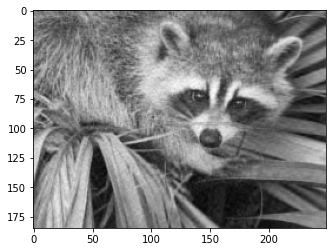

Visualization with 10 components:
	Energy: 0.8006556431491357


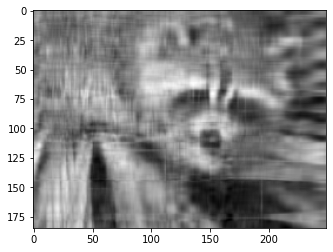

In [80]:
# visualize the reconstructed image

component_numbers = [None, 120, 50, 10]

for component_number in component_numbers:
    print(f"Visualization with {component_number or 'all'} components:")
    u, s, vh, energy, energy_per_component, removed_mean = pca.pca_forward(racoon_gray_resized, component_count=component_number)
    print(f"\tEnergy: {energy}")
    reconstructed_image = pca.pca_reverse(u, s, vh, removed_mean)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.show()

# Part 3: Vadere Pedestrian Visualization

In [96]:
# load the Vadere trajectory data
ped_data = np.loadtxt("../data_DMAP_PCA_vadere.txt")

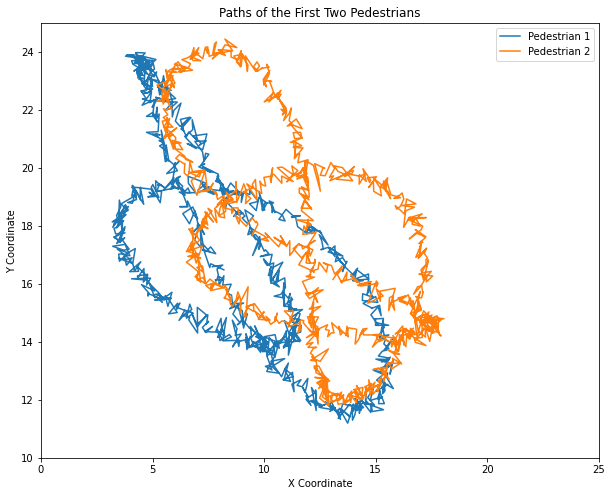

In [101]:
# Extract the x and y coordinates of the first two pedestrians
x1, y1 = ped_data[:, 0], ped_data[:, 1]
x2, y2 = ped_data[:, 2], ped_data[:, 3]

# Plot the paths of the first two pedestrians
plt.figure(figsize=(10, 8))
plt.plot(x1, y1, label='Pedestrian 1')
plt.plot(x2, y2, label='Pedestrian 2')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 25)
plt.ylim(10, 25)
plt.title('Paths of the First Two Pedestrians')
plt.legend()
plt.show()

Testing with 2 components:
	Energy: 0.8492464226063752


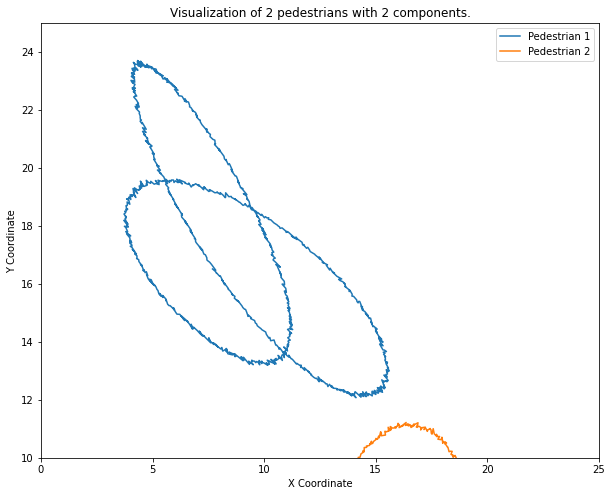

In [102]:
# Project 30-dimensional data points to first 2 principal components
component_number = 2
print(f"Testing with {component_number or 'all'} components:")
u, s, vh, energy, energy_per_component, removed_mean = pca.pca_forward(ped_data, component_count=component_number)
print(f"\tEnergy: {energy}")
reconstructed_traj = pca.pca_reverse(u, s, vh, removed_mean)

# Visualize the first two pedestrians again
plt.figure(figsize=(10, 8))
plt.plot(reconstructed_traj[:, 0], reconstructed_traj[:, 1], label='Pedestrian 1')
plt.plot(reconstructed_traj[:, 3], reconstructed_traj[:, 4], label='Pedestrian 2')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 25)
plt.ylim(10, 25)
plt.title(f'Visualization of 2 pedestrians with {component_number} components.')
plt.legend()
plt.show()

Testing with 1 components:
	Energy: 0.4733056127498329


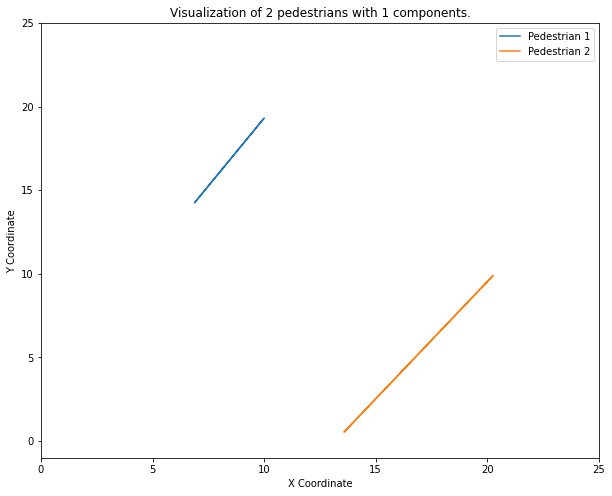

Testing with 2 components:
	Energy: 0.8492464226063752


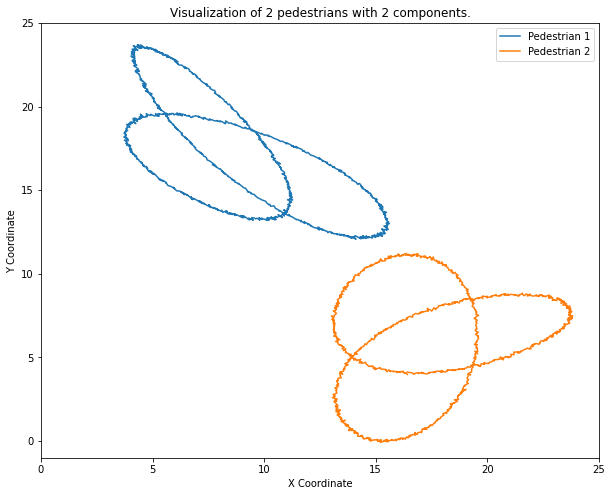

Testing with 3 components:
	Energy: 0.9971310341299298


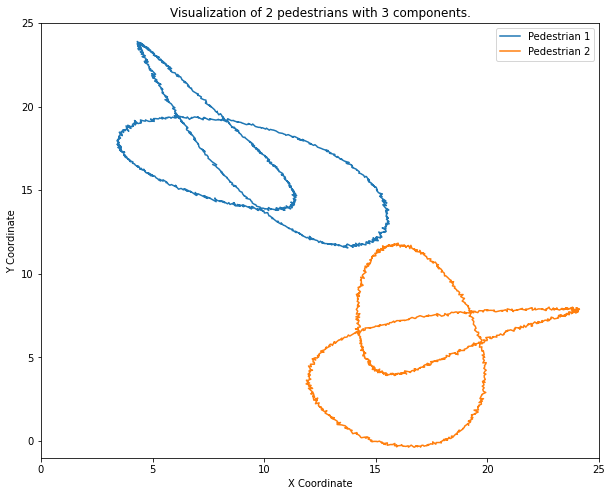

Energy value of 0.9971310341299298 is > 0.9. 3 components were used.


In [103]:
# Find out how many principal components are needed to capture >90% of the energy of the data set
for component_number in range(1, 1000):
    print(f"Testing with {component_number or 'all'} components:")
    u, s, vh, energy, energy_per_component, removed_mean = pca.pca_forward(vadere_traj_txt, component_count=component_number)
    print(f"\tEnergy: {energy}")
    reconstructed_traj = pca.pca_reverse(u, s, vh, removed_mean)

    # Visualize the first two pedestrians again
    plt.figure(figsize=(10, 8))
    plt.plot(reconstructed_traj[:, 0], reconstructed_traj[:, 1], label='Pedestrian 1')
    plt.plot(reconstructed_traj[:, 3], reconstructed_traj[:, 4], label='Pedestrian 2')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(0, 25)
    plt.ylim(-1, 25)
    plt.title(f'Visualization of 2 pedestrians with {component_number} components.')
    plt.legend()
    plt.show()

    if energy > 0.9:
        print(f"Energy value of {energy} is > 0.9. {component_number} components were used.")
        break
